In [ ]:
import cgt 
import pickle
from cgt import * 
import cgt.simulations 
import cgt.parsers 
import splitp as sp 
import numpy as np 
from splitp import phylogenetics 
from cgt.distances import likelihood_function, maximise, mle, mles 
import phylodm 
from phylodm import * 
import pandas as pd
from matplotlib import pyplot 



def my_sim(newick, probabilities, genome_data): 
        # %% Newick: newick tree notation of phylogenetic tree " "(A:1,B:1);" " 
        # %% Genome_Data: Leaf genome data
        # %% Probabilities: rearrangement model used in inferring evolution time 
        # " {MODEL.all_inversions:1/2, MODEL.two_region_adjacent_transpositions: 1/2, MODEL.one_region_inversions: 0, 
        # MODEL.one_region_swaps: 0, MODEL.two_region_inversions: 0} "       

    nan_count=0
    all_genomes=[] 
    all_errors=[]   
    wilks_range=[]
    all_distances=[]
    # %% Generate distance matrix of newick tree 

    with open('/tmp/newick.tree', 'w') as fh: 
        fh.write(newick) 
    pdm = PhyloDM.load_from_newick_path('/tmp/newick.tree') 
    dm = pdm.dm(norm=False) 
    print(np.around(dm, decimals=2, out=None)) 
    
   
    # %% Define framework and model 

    framework = cgt.PositionParadigmFramework(7, oriented=True, symmetry=SYMMETRY.circular)  
 
    # %% Rearrangement definitions
  
    adjacent_swaps=cgt.models.Model(framework, {'(1,2)(-2,-1)' : 1}) 
    one_gap_swaps=cgt.models.Model(framework, {'(1,3)(-3,-1)' : 1}) 
    two_gap_swaps=cgt.models.Model(framework, {'(1,4)(-4,-1)' : 1}) 
    
    model = cgt.Model(framework, probabilities)  
    tree = cgt.simulations.newick_to_tree(newick) 
    cgt.simulations.draw_tree(tree)
    
  #put in thru model #put in diameters.
    
    genomes=[]
    for genome in genome_data:
     # %% Finding accuracy of Max likelihood 
        genomes.append(genome)    
        L = likelihood_function(framework, model, genome) 
        time = maximise(framework, L)
        print(genome)
        print(time)

        if np.isnan(time)==False:
                time2=int((time)*100) 
                times = np.arange(0, time+3, 0.01) 
                f=np.array([L(t) for t in times])
                f=f.tolist()
                
                f_dash=np.gradient(f, 0.01) 
                f_dash_dash=np.gradient(f_dash,0.01)
                
            
                
                interval=[time]
                for i in f:
                    wilks_stat=2*(np.log(L(time))-np.log(i))
                
                    if 2*(1.96)>wilks_stat:
                        interval.append(f.index(i))
                print("Minimum is "+str(min(interval)/100)+" and Maximum is "+str(max(interval)/100)+" and time is "+str(time))
                wilks_range.append((max(interval)-min(interval))/100)
                
        if np.isnan(time)==True:
                f=0
                time2=10000
                nan_count+=1
                         

                                
        

        # %% Compute MLE distance matrix 
    D_MLE = cgt.distances.distance_matrix(framework, model, genome_data, cgt.DISTANCE.MLE) 
    print(D_MLE)
    print(np.around(D_MLE, decimals=2, out=None)) 



    distances=[] 
    for i in range(len(genome_data)): 
        for j in range(len(genome_data)): 
            distances.append((D_MLE[i][j]).round(3)) 
    all_distances.append(distances) 
     
  


    
    # %% Plot maximum likelihood distance differences
    pyplot.hist(distances, bins = [x for x in range(-10,80)], color='grey')  
    pyplot.title("Differences under Maximum likelihood Model")  
    pyplot.show() 




    print("Nan count is")
    print(nan_count)  

    file_name=str(probabilities)+str(newick)+'Max Likelihood csv'
    file_name_2='Wilks_range'+str(probabilities)+str(newick)
        
    df = pd.DataFrame(all_distances)
    df2=pd.DataFrame(wilks_range)
    df.to_csv(str(file_name)+'.csv')
    df1.to_csv(str(file_name_1)+'.csv')
    df2.to_csv(str(file_name_2)+'.csv')

#phylodm crashes when making large matrices

In [ ]:
genomes_to_animals={'[1,5,6,7,2,3,4]': ['Samaris cristatus'], 
         '[1,2,3,4,5,6,7]': ['Lampetra aepyptera', 'Caecilia gracilis', 'Carettochelys insculpta',\
                             'Homo Sapien', 'Aulostomus chinensis'],
         '[1,7,2,3,4,5,6]':['Bregmaceros nectabanus'],
         '[1,2,4,5,6,3,7]':['Saccopharynx lavenbergi'],
         '[1,2,3,4,5,7,6]':['Cynoponticus ferox', 'Hydromantes brunus', 'Dinornis giganteus',\
                            'Rhineura floridana','Oedipina poelzi'],
         '[1,2,3,4,6,7,5]':['Euphlyctis hexadactylus'],
         '[1,2,3,4,6,5,7]':['Sphenodon punctatus'],
         '[1,5,2,3,4,6,7]':['Platysternon megacephalum']}
         
adjacent_swaps={'(1,2)(-2,-1)' : 1}
one_gap_swaps= {'(1,3)(-3,-1)' : 1}
two_gap_swaps= {'(1,4)(-4,-1)' : 1}  
two_region_adjacent_transpositions={'(1,2)(-2,-1)' : 0.25, # Transposition where neither region is inverted
	'(1,2,-1,-2)'  : 0.25, # Transposition where the second region is inverted
	'(1,-2,-1,2)'  : 0.25, # Transposition where the first region is inverted
	'(1,-1)(2,-2)' : 0.25}
all_inversions={'(1,-2)(2,-1)':0.5,
                '(1,-1)': 0.5}
one_region_inversions={'(1,-1)':1}
two_region_inversions={'(1,-2)(2,-1)':1}   
new_model_1={'(1,2)(-2,-1)' : 0.5, 
             '(1,3)(-3,-1)' : 0.25,
             '(1,4)(-4,-1)' : 0.25} #all swaps
new_model_2={'(1,-2)(2,-1)':0.25,
                '(1,-1)': 0.25,
             '(1,2)(-2,-1)' : 0.5*0.25, # Transposition where neither region is inverted
	'(1,2,-1,-2)'  : 0.5*0.25, # Transposition where the second region is inverted
	'(1,-2,-1,2)'  : 0.5*0.25, # Transposition where the first region is inverted
	'(1,-1)(2,-2)' : 0.5*0.25} #equal inv and transpos
new_model_3={'(1,-2)(2,-1)':0.78*0.25,
                '(1,-1)': 0.78*0.25,
             '(1,2)(-2,-1)' : 0.22*0.25, # Transposition where neither region is inverted
	'(1,2,-1,-2)'  : 0.22*0.25, # Transposition where the second region is inverted
	'(1,-2,-1,2)'  : 0.22*0.25, # Transposition where the first region is inverted
	'(1,-1)(2,-2)' : 0.22*0.25} # 78% inv and transpos

model_Dict=[adjacent_swaps, one_gap_swaps, two_gap_swaps, two_region_adjacent_transpositions,\
            all_inversions,one_region_inversions, two_region_inversions, new_model_1,new_model_2,new_model_3]

for model in model_Dict:
    my_sim("(A:1,B:1);", model, [[1,5,6,7,2,3,4],[1,2,3,4,5,6,7], [1,7,2,3,4,5,6],[1,2,4,5,6,3,7], \
                                 [1,2,3,4,5,7,6], [1,2,3,4,6,7,5], [1,2,3,4,6,5,7],\
                                 [1,5,2,3,4,6,7]]) 



In [ ]:
genomes_to_animals={'[1,2,4,3,5,6,7]': ['X'], 
         '[1,2,3,4,5,6,7]': ['Lampetra aepyptera', 'Caecilia gracilis', 'Carettochelys insculpta',\
                             'Homo Sapien', 'Aulostomus chinensis'],
         '[1,7,2,3,4,5,6]':['Platysternon megacephalum'],
                   '[1,4,5,7,6,2,3]':['Y']}
         
adjacent_swaps={'(1,2)(-2,-1)' : 1}
one_gap_swaps= {'(1,3)(-3,-1)' : 1}
two_gap_swaps= {'(1,4)(-4,-1)' : 1}  
two_region_adjacent_transpositions={'(1,2)(-2,-1)' : 0.25, # Transposition where neither region is inverted
	'(1,2,-1,-2)'  : 0.25, # Transposition where the second region is inverted
	'(1,-2,-1,2)'  : 0.25, # Transposition where the first region is inverted
	'(1,-1)(2,-2)' : 0.25}
all_inversions={'(1,-2)(2,-1)':0.5,
                '(1,-1)': 0.5}
one_region_inversions={'(1,-1)':1}
two_region_inversions={'(1,-2)(2,-1)':1}   
new_model_1={'(1,2)(-2,-1)' : 0.5, 
             '(1,3)(-3,-1)' : 0.25,
             '(1,4)(-4,-1)' : 0.25} #all swaps
new_model_2={'(1,-2)(2,-1)':0.25,
                '(1,-1)': 0.25,
             '(1,2)(-2,-1)' : 0.5*0.25, # Transposition where neither region is inverted
	'(1,2,-1,-2)'  : 0.5*0.25, # Transposition where the second region is inverted
	'(1,-2,-1,2)'  : 0.5*0.25, # Transposition where the first region is inverted
	'(1,-1)(2,-2)' : 0.5*0.25} #equal inv and transpos
new_model_3={'(1,-2)(2,-1)':0.78*0.25,
                '(1,-1)': 0.78*0.25,
             '(1,2)(-2,-1)' : 0.22*0.25, # Transposition where neither region is inverted
	'(1,2,-1,-2)'  : 0.22*0.25, # Transposition where the second region is inverted
	'(1,-2,-1,2)'  : 0.22*0.25, # Transposition where the first region is inverted
	'(1,-1)(2,-2)' : 0.22*0.25} # 78% inv and transpos

model_Dict=[adjacent_swaps, one_gap_swaps, two_gap_swaps, two_region_adjacent_transpositions,\
            all_inversions,one_region_inversions, two_region_inversions, new_model_1,new_model_2,new_model_3]

for model in model_Dict:
    my_sim("(A:3,B:1);", model, [[1,2,4,3,5,6,7],[1,2,3,4,5,6,7],[1,7,2,3,4,5,6],[1,4,5,7,6,2,3]]) 



[[0. 6.]
 [6. 0.]]


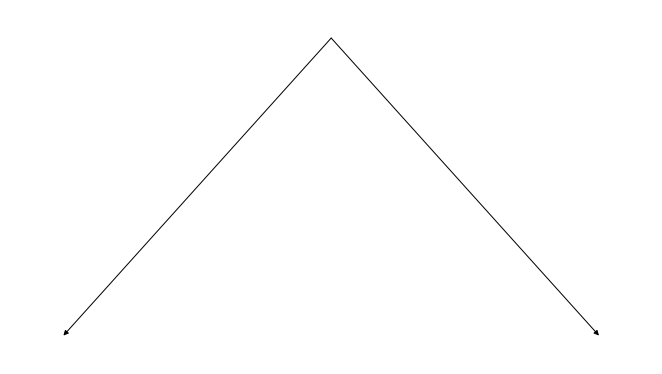

[1, 3, 4, 7, 2, 5, 6]
99.99852115138225
Minimum is 0.9999852115138225 and Maximum is 10299/100 and time is 99.99852115138225
[1, 2, 3, 4, 5, 6, 7]
4.508547259192991e-06
Minimum is 0 and Maximum is 233/100 and time is 4.508547259192991e-06
[1, 2, 3, 5, 6, 4, 7]
2.793494386694995


<ipython-input-17-ddc4402be66a>:77: RuntimeWarning: invalid value encountered in log
  wilks_stat=Integer(2)*(np.log(L(time))-np.log(i))


Minimum is 0.02793494386694995 and Maximum is 579/100 and time is 2.793494386694995
[[ 0.         99.99923868  5.201158  ]
 [ 0.          0.          2.79349439]
 [ 0.          0.          0.        ]]
[[  0.   100.     5.2 ]
 [  0.     0.     2.79]
 [  0.     0.     0.  ]]
[[0. 5. 3.]
 [0. 0. 2.]
 [0. 0. 0.]]


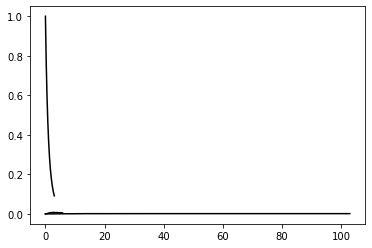

0.0
11.999222222222222


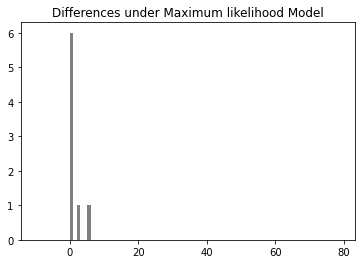

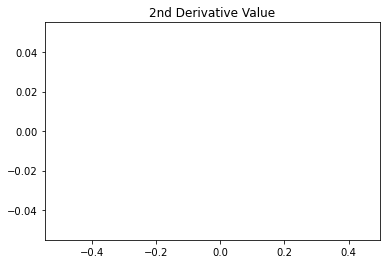

nan
5.76206505613305
Nan count is
0
[[0. 6.]
 [6. 0.]]


/home/ubuntu/sage/SageMath/local/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


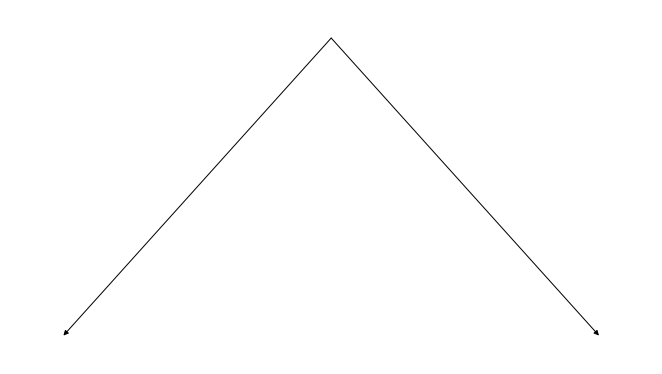

[1, 3, 4, 7, 2, 5, 6]
19.562645369868186


<ipython-input-17-ddc4402be66a>:77: RuntimeWarning: invalid value encountered in log
  wilks_stat=Integer(2)*(np.log(L(time))-np.log(i))


Minimum is 0.19562645369868187 and Maximum is 564/25 and time is 19.562645369868186
[1, 2, 3, 4, 5, 6, 7]
4.508547259192991e-06
Minimum is 0 and Maximum is 233/100 and time is 4.508547259192991e-06
[1, 2, 3, 5, 6, 4, 7]
10.212211855695887


<ipython-input-17-ddc4402be66a>:77: RuntimeWarning: invalid value encountered in log
  wilks_stat=Integer(2)*(np.log(L(time))-np.log(i))


Minimum is 0.10212211855695888 and Maximum is 1321/100 and time is 10.212211855695887
[[ 0.         19.56264537 22.13785833]
 [ 0.          0.         10.21221186]
 [ 0.          0.          0.        ]]
[[ 0.   19.56 22.14]
 [ 0.    0.   10.21]
 [ 0.    0.    0.  ]]
[[0. 5. 5.]
 [0. 0. 4.]
 [0. 0. 0.]]


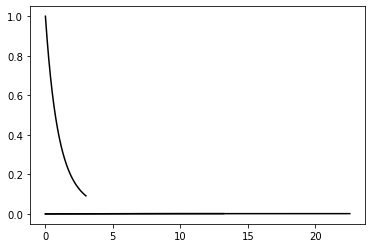

0.0
5.768111111111111


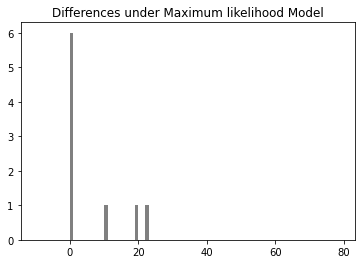

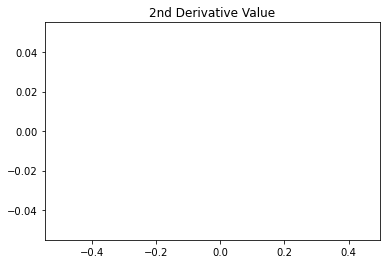

nan
13.107877881443041
Nan count is
0
[[0. 6.]
 [6. 0.]]


/home/ubuntu/sage/SageMath/local/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


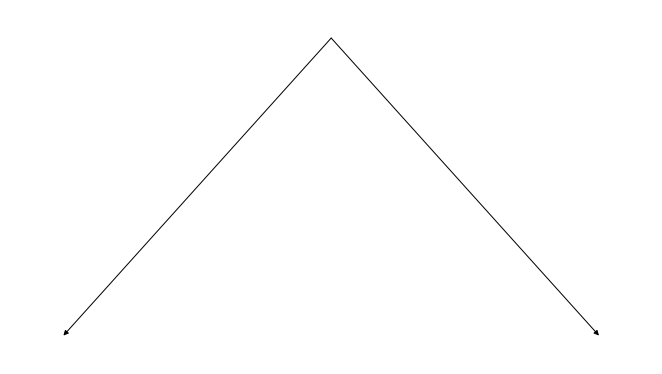

[1, 3, 4, 7, 2, 5, 6]
99.9992386837761
Minimum is 0.999992386837761 and Maximum is 10299/100 and time is 99.9992386837761
[1, 2, 3, 4, 5, 6, 7]
4.508547259192991e-06
Minimum is 0 and Maximum is 233/100 and time is 4.508547259192991e-06
[1, 2, 3, 5, 6, 4, 7]
6.673834321865123


<ipython-input-17-ddc4402be66a>:77: RuntimeWarning: invalid value encountered in log
  wilks_stat=Integer(2)*(np.log(L(time))-np.log(i))


Minimum is 0.06673834321865123 and Maximum is 967/100 and time is 6.673834321865123
[[ 0.         99.99942237 99.99999241]
 [ 0.          0.          6.67383432]
 [ 0.          0.          0.        ]]
[[  0.   100.   100.  ]
 [  0.     0.     6.67]
 [  0.     0.     0.  ]]
[[0. 5. 7.]
 [0. 0. 4.]
 [0. 0. 0.]]


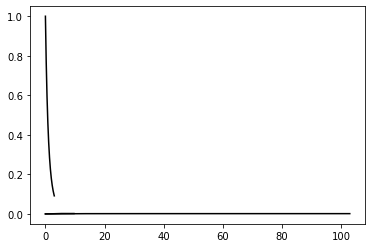

0.0
22.96366666666667


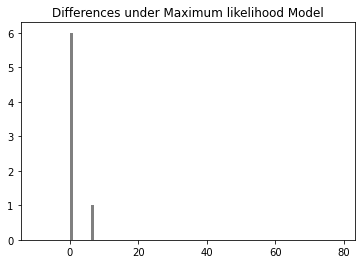

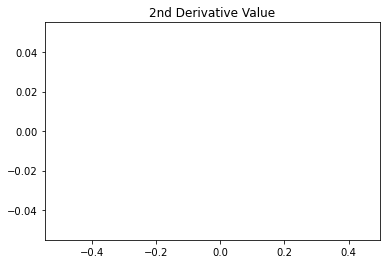

nan
9.60326165678135
Nan count is
0
[[0. 6.]
 [6. 0.]]


/home/ubuntu/sage/SageMath/local/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


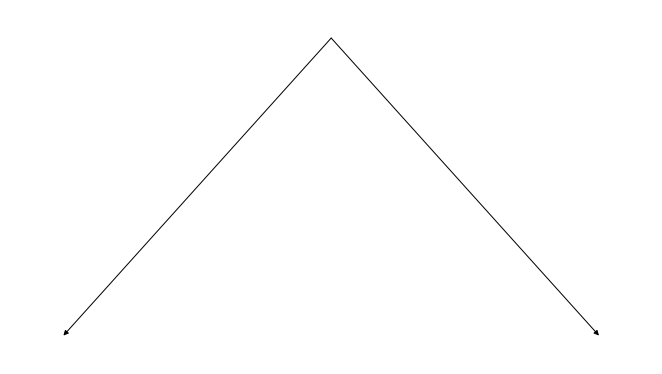

[1, 3, 4, 7, 2, 5, 6]
nan
[1, 2, 3, 4, 5, 6, 7]
4.508547259192991e-06
Minimum is 0 and Maximum is 203/100 and time is 4.508547259192991e-06
[1, 2, 3, 5, 6, 4, 7]
2.2728829930681864
Minimum is 0.022728829930681864 and Maximum is 527/100 and time is 2.2728829930681864
[[0.                nan 3.78453412]
 [0.         0.         2.27288299]
 [0.         0.         0.        ]]
[[0.    nan 3.78]
 [0.   0.   2.27]
 [0.   0.   0.  ]]
[[0. 5. 3.]
 [0. 0. 2.]
 [0. 0. 0.]]


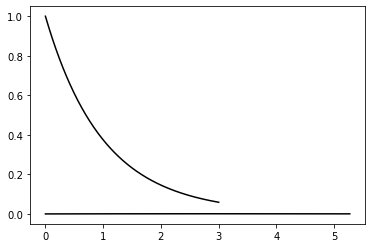

0.0
0.75725


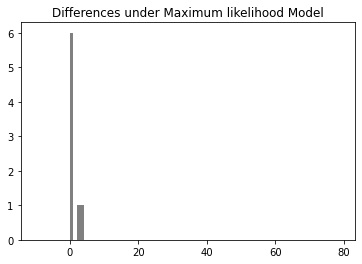

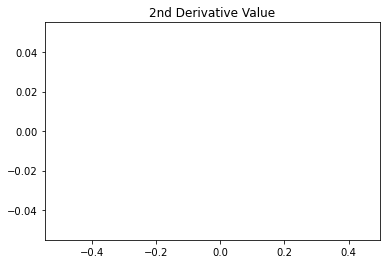

/home/ubuntu/sage/SageMath/local/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


nan
3.638635585034659
Nan count is
1
[[0. 6.]
 [6. 0.]]


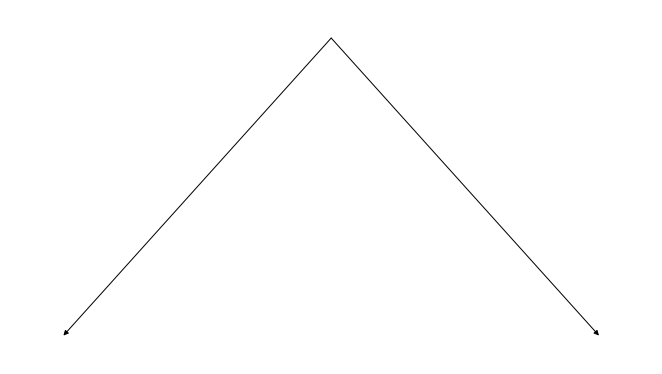

In [ ]:
genomes_to_animals={'[1,3,4,7,2,5,6]': ['X'], 
         '[1,2,3,4,5,6,7]': ['Lampetra aepyptera', 'Caecilia gracilis', 'Carettochelys insculpta',\
                             'Homo Sapien', 'Aulostomus chinensis'],
                   '[1,2,3,5,6,4,7]':['Y']}
         
adjacent_swaps={'(1,2)(-2,-1)' : 1}
one_gap_swaps= {'(1,3)(-3,-1)' : 1}
two_gap_swaps= {'(1,4)(-4,-1)' : 1}  
two_region_adjacent_transpositions={'(1,2)(-2,-1)' : 0.25, # Transposition where neither region is inverted
	'(1,2,-1,-2)'  : 0.25, # Transposition where the second region is inverted
	'(1,-2,-1,2)'  : 0.25, # Transposition where the first region is inverted
	'(1,-1)(2,-2)' : 0.25}
all_inversions={'(1,-2)(2,-1)':0.5,
                '(1,-1)': 0.5}
one_region_inversions={'(1,-1)':1}
two_region_inversions={'(1,-2)(2,-1)':1}   
new_model_1={'(1,2)(-2,-1)' : 0.5, 
             '(1,3)(-3,-1)' : 0.25,
             '(1,4)(-4,-1)' : 0.25} #all swaps
new_model_2={'(1,-2)(2,-1)':0.25,
                '(1,-1)': 0.25,
             '(1,2)(-2,-1)' : 0.5*0.25, # Transposition where neither region is inverted
	'(1,2,-1,-2)'  : 0.5*0.25, # Transposition where the second region is inverted
	'(1,-2,-1,2)'  : 0.5*0.25, # Transposition where the first region is inverted
	'(1,-1)(2,-2)' : 0.5*0.25} #equal inv and transpos
new_model_3={'(1,-2)(2,-1)':0.78*0.25,
                '(1,-1)': 0.78*0.25,
             '(1,2)(-2,-1)' : 0.22*0.25, # Transposition where neither region is inverted
	'(1,2,-1,-2)'  : 0.22*0.25, # Transposition where the second region is inverted
	'(1,-2,-1,2)'  : 0.22*0.25, # Transposition where the first region is inverted
	'(1,-1)(2,-2)' : 0.22*0.25} # 78% inv and transpos

model_Dict=[adjacent_swaps, one_gap_swaps, two_gap_swaps, two_region_adjacent_transpositions,\
            all_inversions,one_region_inversions, two_region_inversions, new_model_1,new_model_2,new_model_3]

for model in model_Dict:
    my_sim("(A:5,B:1);", model, [[1,3,4,7,2,5,6],[1,2,3,4,5,6,7],[1,2,3,5,6,4,7]]) 

